In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'1.13.1'

In [3]:
#generating data sample, each row a single sample of 4D vector,
#each column a single vector component
import numpy as np

def mvn_rand(mu_delta, dims=4):
    mu = np.random.random_sample(dims) + mu_delta
    A = np.random.random_sample(dims + dims).reshape(-1,dims)
    return np.random.multivariate_normal(mu, A.T @ A, size=100)


In [14]:
np.__version__

'1.16.2'

In [4]:
#generate the sample and color each cluster
np.random.seed(102)
sample = np.vstack((mvn_rand(2), mvn_rand(0), mvn_rand(-2)))
col = np.repeat(['red','green', 'blue'],100)


In [15]:
s = sample.shape
c = col.shape
print( "sample {}, col {}".format(s,c))

sample (300, 4), col (300,)


In [16]:
sample[:5,:]

array([[3.1405614 , 3.43792928, 2.31894454, 2.77470209],
       [3.68022219, 4.17732695, 3.14882387, 4.28787584],
       [1.53647704, 1.19865906, 1.71722893, 1.65900102],
       [1.99080415, 1.83249348, 1.90551407, 2.00739095],
       [2.11901966, 2.0114606 , 1.95447118, 2.09813207]])

In [17]:
col[:5]

array(['red', 'red', 'red', 'red', 'red'], dtype='<U5')

In [7]:
#setting the neural network
#define input and weight matrices
x = tf.placeholder(shape=[None, 4], dtype=tf.float32)
w1 = tf.Variable(tf.truncated_normal(stddev = .1, shape=[4,12]),
                dtype=tf.float32)
w2 = tf.Variable(tf.truncated_normal(stddev=.1, shape=[12,2]), 
                dtype = tf.float32)
#neural network
hidden_1 = tf.nn.tanh(tf.matmul(x,w1))
projection = tf.matmul(hidden_1, w2)
hidden_2 = tf.nn.tanh(projection)
hidden_3 = tf.nn.tanh(tf.matmul(hidden_2,tf.transpose(w2)))
y = tf.matmul(hidden_3, tf.transpose(w1))

#loss function and optimizer
loss = tf.reduce_mean(tf.reduce_sum((x - y) * (x - y), 1))
optimize = tf.train.AdamOptimizer().minimize(loss)
init = tf.initialize_all_variables()

##code follows a 4-12-2-12-4 architecture with tanh activation function and MSE (Mean Squared Error)
#plot 2D projection from the middle layer every 10000 steps

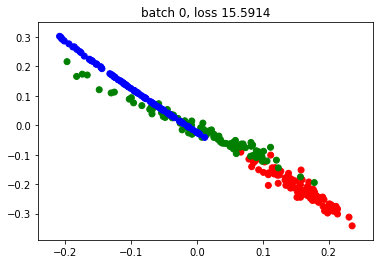

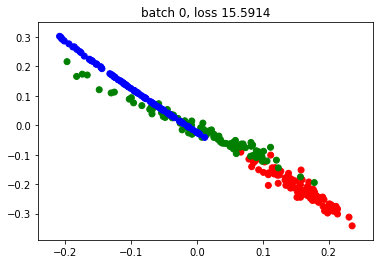

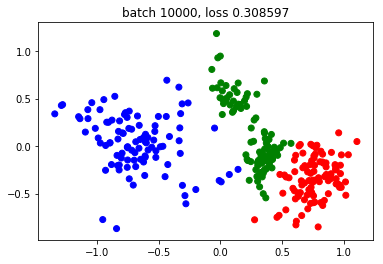

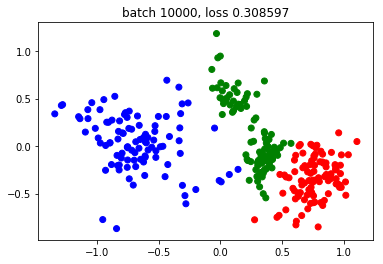

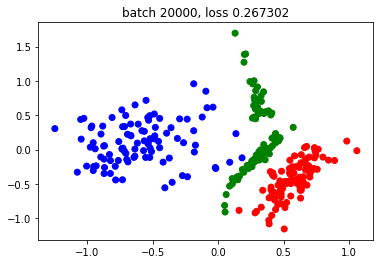

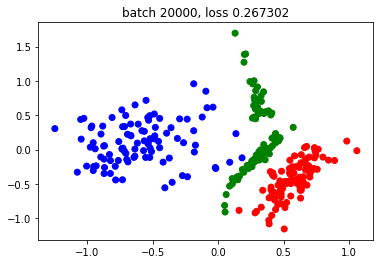

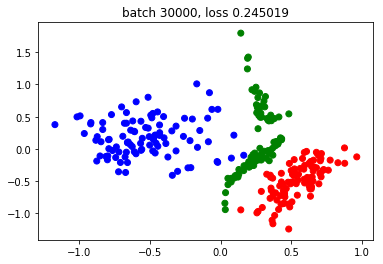

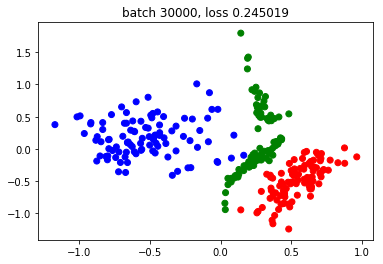

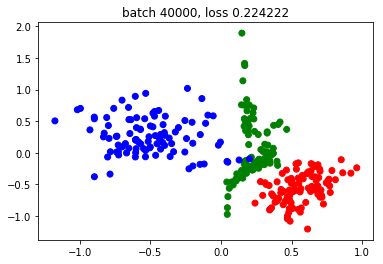

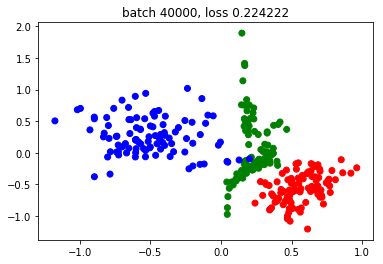

In [13]:
#training
import matplotlib.pyplot as plt
%matplotlib inline
with tf.Session() as session:
    session.run(init)
    feed_dict = {x: sample}
    
    for batch in range(50000):
        session.run(optimize, feed_dict = feed_dict)
        
        eval_loss, eval_2d = session.run([loss, projection], feed_dict=feed_dict)
        if batch % 10000 == 0:
            plt.clf()
            plt.scatter(eval_2d[:,0], eval_2d[:,1], c=col)
            plt.title('batch %d, loss %g' % (batch, eval_loss))
            plt.show(False)
            plt.pause(0.001)
        